# Function Testing Notebook - Joseph

This notebook is meant to test external-facing functions to ensure they are working as expected.

A dedicated test_all_functions.py with unit testing might be better, but this is a good benchmark

In [1]:
import logging
import os
import sys
import tempfile
import time
from pathlib import Path

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import mne
import numpy as np
import pandas as pd
from dask.distributed import Client, LocalCluster
from dask_jobqueue import SLURMCluster

In [2]:
from pythoneeg import constants, core, visualization

print(core.__all__)
# print(visualization.__all__)
# print(dir(constants))

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['DDFBinaryMetadata', 'LongRecordingOrganizer', 'convert_ddfcolbin_to_ddfrowbin', 'convert_ddfrowbin_to_si', 'convert_units_to_multiplier', 'convert_colpath_to_rowpath', 'filepath_to_index', 'is_day', 'set_temp_directory', 'get_temp_directory', 'parse_path_to_animalday', 'parse_str_to_genotype', 'parse_str_to_animal', 'parse_str_to_day', 'parse_chname_to_abbrev', 'nanaverage', 'LongRecordingAnalyzer', 'MountainSortAnalyzer', 'FragmentAnalyzer', '_log_transform']


In [3]:
tempdir = Path('../../tmp').resolve()
print(tempdir)
core.set_temp_directory(tempdir)

/mnt/isilon/marsh_single_unit/PythonEEG/tmp


In [4]:
data_folder = Path('./test-data').resolve()
lrec = core.LongRecordingOrganizer(base_folder_path= data_folder / 'A10 KO 12_13_2023',
                                    truncate=3)
lrec.convert_colbins_to_rowbins(overwrite=False)
lrec.convert_rowbins_to_rec()

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/core/core.py:220: UserWarning: LongRecording will be truncated to the first 3 files
  warnings.warn(f"LongRecording will be truncated to the first {self.n_truncate} files")


In [5]:
Path('./test-wars/A5').resolve()

PosixPath('/mnt/isilon/marsh_single_unit/PythonEEG/notebooks/tests/test-wars/A5')

In [6]:
# Set up logger with detailed formatting
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG, stream=sys.stdout, force=True)
logger = logging.getLogger()


In [7]:
%%script true

cluster = LocalCluster()
display(cluster)

# animal_ids = ['A5', 'A10', 'F22', 'G25', 'G26', 'N21', 'N22', 'N23', 'N24', 'N25']
# animal_ids = ['A5', 'A10']
# animal_ids = []
# animal_ids = ['A5']
# animal_ids = ['A10']
animal_ids = ["F22"]
# animal_ids = ['G25']
base_folder = Path("./test-data").resolve()
# base_folder = Path('/mnt/isilon/marsh_single_unit/PythonEEG Data Bins').resolve()
for animal_id in animal_ids:
    ao = visualization.AnimalOrganizer(base_folder, animal_id, mode="concat", assume_from_number=True, truncate=False)
    ao.convert_colbins_to_rowbins(overwrite=False)
    ao.convert_rowbins_to_rec()  # parallelization breaks if not enough memory

    ao.compute_bad_channels()

    with Client(cluster) as client:
        # client.upload_file(str(packageroot / 'pythoneeg.zip'))
        display(client)
        print("running war")
        # ao.convert_rowbins_to_rec(multiprocess_mode='dask') # paralleization breaks if not enough memory
        war = ao.compute_windowed_analysis(["all"], multiprocess_mode="serial")
    #     war.save_pickle_and_json(Path(f'./test-wars-full/{animal_id}').resolve())

    # with Client(cluster) as client:
    #     client.upload_file(str(packageroot / 'pythoneeg.zip'))
    #     display(client)
    #     print("running sar")
    #     sar = ao.compute_spike_analysis(multiprocess_mode='dask')

2025-06-17 03:40:24,977 - DEBUG - Using selector: EpollSelector


In [8]:
# df = pd.read_pickle('/mnt/isilon/marsh_single_unit/PythonEEG/notebooks/tests/test-wars-full/031621_cohort 2 group 2 and group 5 F6/f6-fhet.pkl')
# display(df)

In [9]:
war = visualization.WindowAnalysisResult.load_pickle_and_json(Path('./test-wars/A10').resolve())
# war = visualization.WindowAnalysisResult.load_pickle_and_json(Path('/mnt/isilon/marsh_single_unit/PythonEEG/notebooks/tests/test-wars-sox5-2/061022_group 9 M1, M2, M3 group9_M1_Cage1').resolve())
# war.result = war.result.head(2)
res1 = war.get_result(['all'], allow_missing=True)
# war.aggregate_time_windows()
war.add_unique_hash()
war.filter_all()
res2 = war.get_result(['all'], allow_missing=True)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None, 
#                       'display.max_colwidth', 1000, 'display.width', None):
display(res1)
display(res2)

2025-06-17 03:40:25,093 - WARNING - Intan Input (1)/PortC C-009 does not match name aliases. Assuming alias from number in channel name.
2025-06-17 03:40:25,095 - WARNING - Intan Input (1)/PortC C-010 does not match name aliases. Assuming alias from number in channel name.
2025-06-17 03:40:25,095 - WARNING - Intan Input (1)/PortC C-012 does not match name aliases. Assuming alias from number in channel name.
2025-06-17 03:40:25,096 - WARNING - Intan Input (1)/PortC C-014 does not match name aliases. Assuming alias from number in channel name.
2025-06-17 03:40:25,096 - WARNING - Intan Input (1)/PortC C-015 does not match name aliases. Assuming alias from number in channel name.
2025-06-17 03:40:25,096 - WARNING - Intan Input (1)/PortC C-016 does not match name aliases. Assuming alias from number in channel name.
2025-06-17 03:40:25,097 - WARNING - Intan Input (1)/PortC C-017 does not match name aliases. Assuming alias from number in channel name.
2025-06-17 03:40:25,097 - WARNING - Intan

2025-06-17 03:40:25,182 - WARNING - Intan Input (1)/PortC C-010 does not match name aliases. Assuming alias from number in channel name.
2025-06-17 03:40:25,183 - WARNING - Intan Input (1)/PortC C-012 does not match name aliases. Assuming alias from number in channel name.
2025-06-17 03:40:25,184 - WARNING - Intan Input (1)/PortC C-014 does not match name aliases. Assuming alias from number in channel name.
2025-06-17 03:40:25,184 - WARNING - Intan Input (1)/PortC C-015 does not match name aliases. Assuming alias from number in channel name.
2025-06-17 03:40:25,186 - WARNING - Intan Input (1)/PortC C-016 does not match name aliases. Assuming alias from number in channel name.
2025-06-17 03:40:25,187 - WARNING - Intan Input (1)/PortC C-017 does not match name aliases. Assuming alias from number in channel name.
2025-06-17 03:40:25,190 - WARNING - Intan Input (1)/PortC C-019 does not match name aliases. Assuming alias from number in channel name.
2025-06-17 03:40:25,191 - WARNING - Intan

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/results.py:476: UserWarning: Dropping column 'index'
  warnings.warn("Dropping column 'index'")


Channel names: 	['Intan Input (1)/PortC C-009', 'Intan Input (1)/PortC C-010', 'Intan Input (1)/PortC C-012', 'Intan Input (1)/PortC C-014', 'Intan Input (1)/PortC C-015', 'Intan Input (1)/PortC C-016', 'Intan Input (1)/PortC C-017', 'Intan Input (1)/PortC C-019', 'Intan Input (1)/PortC C-021', 'Intan Input (1)/PortC C-022']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']


animalday animal        day genotype  duration endfile  \
0   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
1   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
2   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
3   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
4   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
5   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
6   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
7   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
8   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
9   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
10  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
11  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
12  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
13  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
14  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
15  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
16  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
17  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
18  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
19  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
20  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
21  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
22  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
23  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
24  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
25  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
26  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
27  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
28  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
29  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
30  A10 KO Dec-13-2023    A10 2023-12-13       KO      0.36    None   

                 timestamp  isday  \
0  2023-12-13 11:15:31.640   True   
1  2023-12-13 11:15:35.640   True   
2  2023-12-13 11:15:39.640   True   
3  2023-12-13 11:15:43.640   True   
4  2023-12-13 11:15:47.640   True   
5  2023-12-13 11:15:51.640   True   
6  2023-12-13 11:15:55.640   True   
7  2023-12-13 11:15:59.640   True   
8  2023-12-13 11:16:03.640   True   
9  2023-12-13 11:16:07.640   True   
10 2023-12-13 11:16:11.640   True   
11 2023-12-13 11:16:15.640   True   
12 2023-12-13 11:16:19.640   True   
13 2023-12-13 11:16:23.640   True   
14 2023-12-13 11:16:27.640   True   
15 2023-12-13 11:16:31.640   True   
16 2023-12-13 11:16:35.640   True   
17 2023-12-13 11:16:39.640   True   
18 2023-12-13 11:16:43.640   True   
19 2023-12-13 11:16:47.640   True   
20 2023-12-13 11:16:51.640   True   
21 2023-12-13 11:16:55.640   True   
22 2023-12-13 11:16:59.640   True   
23 2023-12-13 11:17:03.640   True   
24 2023-12-13 11:17:07.640   True   
25 2023-12-13 11:17:11.640   True   
26 2023-12-13 11:17:15.640   True   
27 2023-12-13 11:17:19.640   True   
28 2023-12-13 11:17:23.640   True   
29 2023-12-13 11:17:27.640   True   
30 2023-12-13 11:17:31.640   True   

                                                  rms  \
0   [45.94368, 79.14001, 35.04157, 72.76703, 49.01...   
1   [17.3866, 104.45948, 17.702438, 87.68797, 40.2...   
2   [21.215878, 101.42183, 17.911005, 85.187965, 4...   
3   [16.124065, 86.00607, 14.081838, 77.030235, 47...   
4   [18.514662, 95.01182, 19.664528, 86.265015, 54...   
5   [23.87738, 95.44384, 23.737915, 80.19445, 50.5...   
6   [17.575134, 114.56625, 16.799383, 84.014496, 3...   
7   [18.340143, 83.75154, 15.620064, 96.09968, 40....   
8   [17.474148, 109.268486, 12.681339, 92.

animalday  \
0   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
1   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
2   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
3   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
4   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
5   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
6   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
7   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
8   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
9   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
10  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
11  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
12  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
13  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
14  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
15  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
16  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
17  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
18  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
19  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
20  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
21  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
22  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
23  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
24  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
25  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
26  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
27  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
28  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
29  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   
30  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d...   

                                               animal        day genotype  \
0   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
1   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
2   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
3   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
4   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
5   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
6   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
7   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
8   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
9   A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
10  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
11  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
12  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
13  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
14  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
15  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
16  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
17  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
18  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
19  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
20  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
21  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
22  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
23  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
24  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
25  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
26  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-13       KO   
27  A10_678015ad7ff1ea43870be11746aefc3b6711bf891d... 2023-12-1

In [10]:
print(war.bad_channels_dict)
# war.get_filter_reject_channels_by_recording_session()
# war.filter_all()

{}


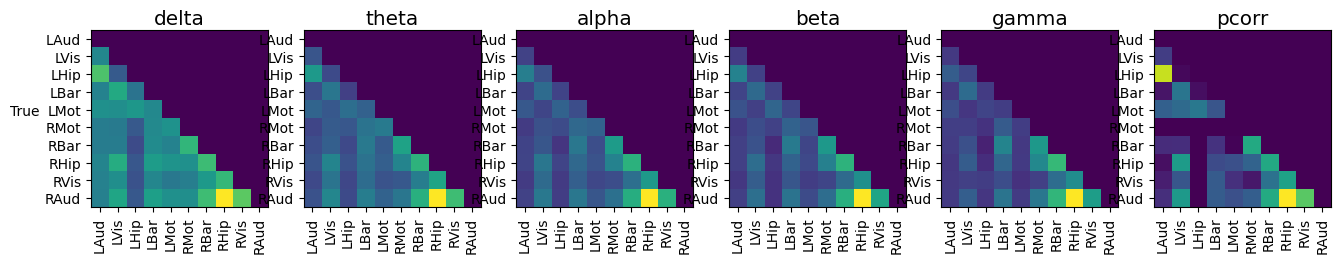

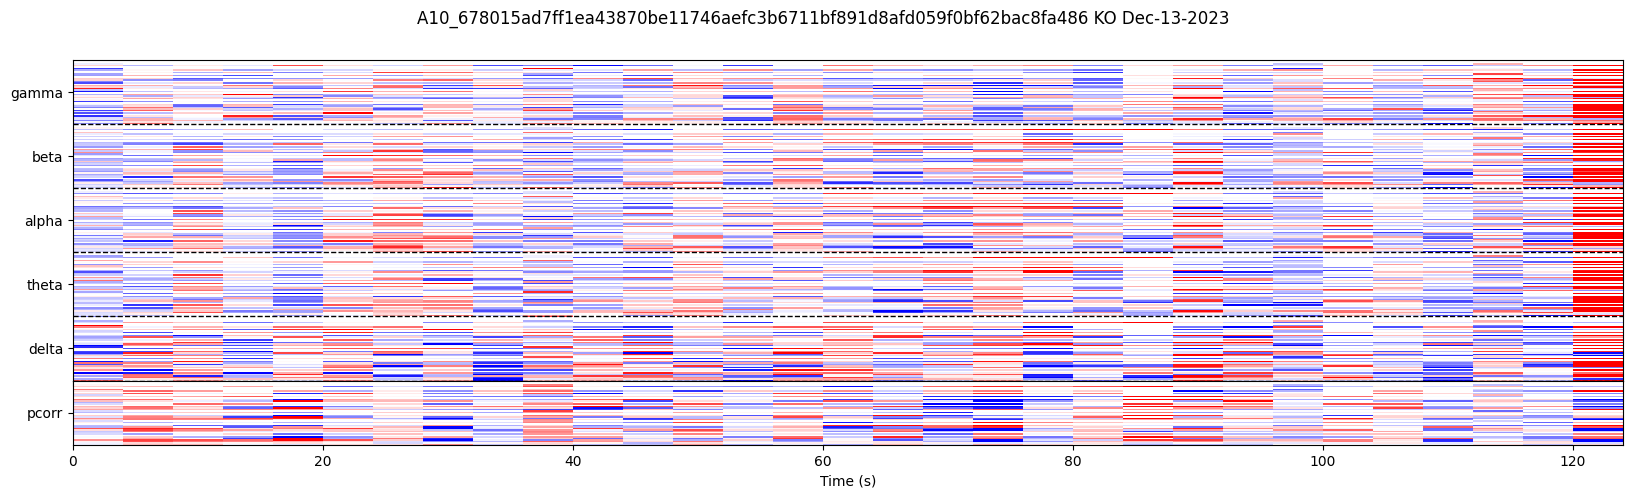

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/animal.py:411: RuntimeWarning: divide by zero encountered in log10
  ax[0, i].plot(freqs, 10 ** (b + m * np.log10(freqs)), c=f"C{j}", alpha=0.75)


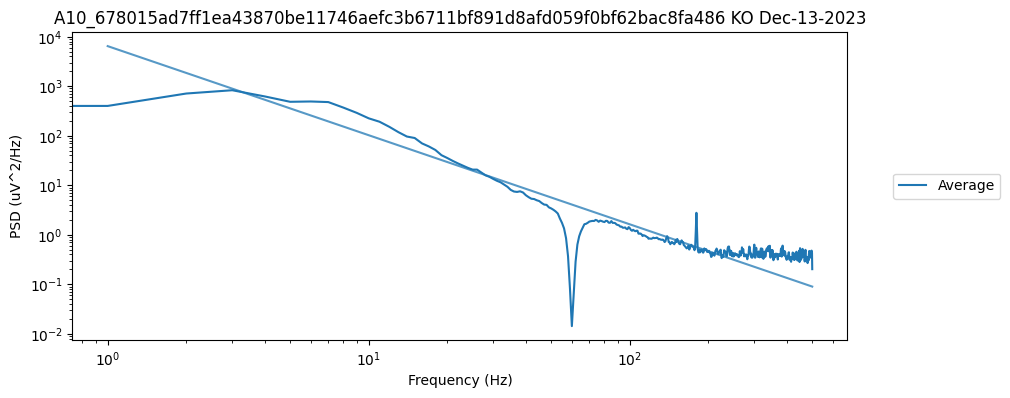

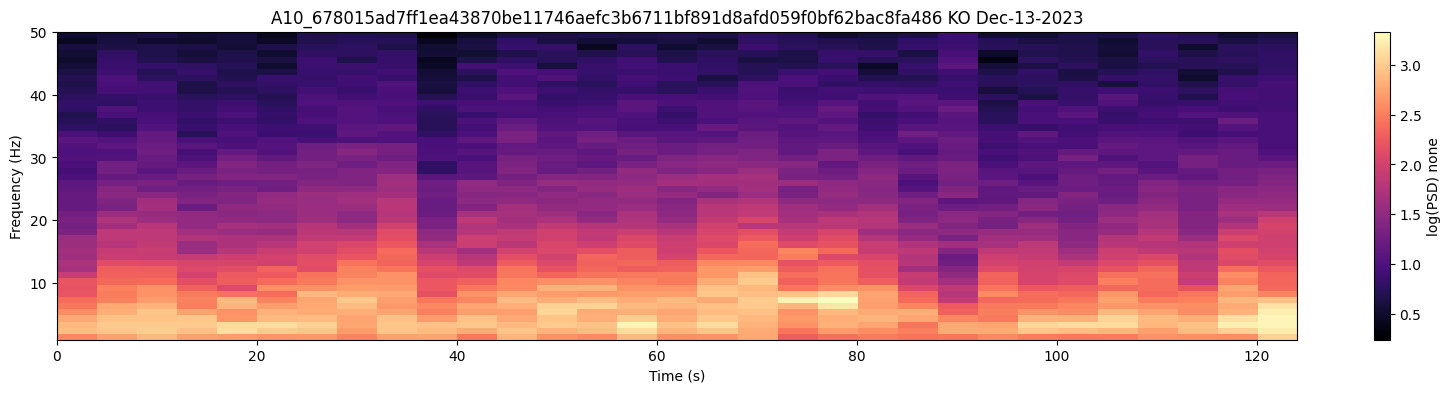

In [11]:
logger.setLevel(logging.WARNING)
ap = visualization.AnimalPlotter(war)
ap.plot_coherecorr_matrix(['isday'], bands=None, figsize=(16,5), cmap='viridis')
# ap.plot_coherecorr_diff(['isday'], bands=None, figsize=(16,5))
# ap.plot_linear_temporal(figsize=(20, 5), score_type='z', lw=1, channels=[0, 1])
# ap.plot_linear_temporal(['isday'], figsize=(20, 5), score_type='z', lw=1, channels=[0, 1, 2, 3])

# ap.plot_coherecorr_spectral(['isday'], figsize=(20, 5), score_type='center')

ap.plot_coherecorr_spectral(figsize=(20, 5), score_type='center')
ap.plot_psd_histogram(figsize=(10, 4), avg_channels=True, plot_type='loglog')
ap.plot_psd_spectrogram(figsize=(20, 4), mode='none')

In [12]:
logger.setLevel(logging.DEBUG)
wars = []
# animal_ids = ['A5', 'A10', 'F22']
animal_ids = [p for p in Path("./test-wars-sox5-collapsed-3").glob("*") if p.is_dir()]
print([p.name for p in animal_ids])

for i, animal_id in enumerate(animal_ids):
    war = visualization.WindowAnalysisResult.load_pickle_and_json(animal_id)
    wars.append(war)

ep = visualization.ExperimentPlotter(
    wars=wars,
    exclude=["nspike", "lognspike"],
    # exclude=["nspike", "psdfrac", "logrms", "logampvar", "logpsdtotal", "lognspike", "logpsdband", "logpsdfrac"],
)


['#8 Cage 1A_e42730c8', 'M2_852ba48e', 'FMUT_d9c1cbdd', 'group9_M3_Cage 4_b40b247d', 'MMUT_7c16dec9', 'FMUT(2)_e98f209d', 'M3_978e0ac2', 'MMUT_e9af5503', 'CF2_f0825593', 'mouse M5 cage2A_b00c8e7c', 'mouse M3 cage1A_5ea9c651', 'F10_2a14ea46', 'FMUT_5caeba88', 'F7_4a22ff34', 'FHET(1)_ee7a076c', 'M8_ff0f9e5a', 'M2_23b1704c', '#8 Cage 3A_3362d3d8', 'M4_1440c6d1', 'CM9_f3d00a58', 'M7_6cb5b6e5', 'GF4_e980154a', 'F6_21b373e4', 'FWT_0e712587', 'M10_989f0e48', 'FMUT_6e837981', 'DF3_f12d3573', 'FMUT__ac4abe90', 'FMUT_714f0a22', 'MMUT_468d54d5', 'F9_131aeb0f', 'MMUT(1)_fdc7bffb', '040221_Group 1 Mouse 9 Recording_e7d042b8', 'CF1_51d1157c', 'BM6_4f03717c', 'M10_fe8c1801', 'FWT_13eb8ca3', 'MMUT(2)_73b5021c', '#3 Cage 4A_f84ab629', 'EM1_64bb7549', 'F4_cfe7c52d', 'M8_e45b9130', 'AM4_ac457c89', 'mouse M5 cage4A_bd849d8c', 'AM5_b53293ce', 'M2_b136b92c', 'BF3_669fecbd', 'CM5_49c14efe', '032221_cohort 2, Group 3, Mouse 6 Cage 2A Re-Recording_82db0572', 'F5_3593cfee', 'FF6_440580d3', 'mouse M3 cage3A_96ef

In [44]:
save_folder = '/home/dongjp/Downloads/6-17 soEPfigs'
save_files = False
save_folder = Path(save_folder)
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
display(save_folder)

PosixPath('/home/dongjp/Downloads/6-17 soEPfigs')

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:193: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, tril_indices[0], tril_indices[1]], axis=-1)
/tmp/ipykernel_3992468/3955361158.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  animal_counts = df.groupby(['gene', 'sex'])['animal'].nunique()
/tmp/ipykernel_3992468/3955361158.py:52: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df.pivot_table(
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:208: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, :, tril_indices[0], tri


Number of animals per gene/sex group:
gene  sex   
WT    Female     6
      Male      13
Het   Female    11
      Male       9
Mut   Female    10
      Male       9
Name: animal, dtype: int64

Number of animals per gene/sex group:
gene  sex   
WT    Female     6
      Male      13
Het   Female    11
      Male       9
Mut   Female    10
      Male       9
Name: animal, dtype: int64


/tmp/ipykernel_3992468/3955361158.py:52: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df.pivot_table(
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:179: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/tmp/ipykernel_3992468/3955361158.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(groupby).agg({feature: lambda x: np.nanmean(x), "genotype": "first"}).reset_index()
/tmp/ipykernel_3992468/3955361158.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to


Number of animals per gene/sex group:
gene  sex   
WT    Female     6
      Male      13
Het   Female    11
      Male       9
Mut   Female    10
      Male       9
Name: animal, dtype: int64


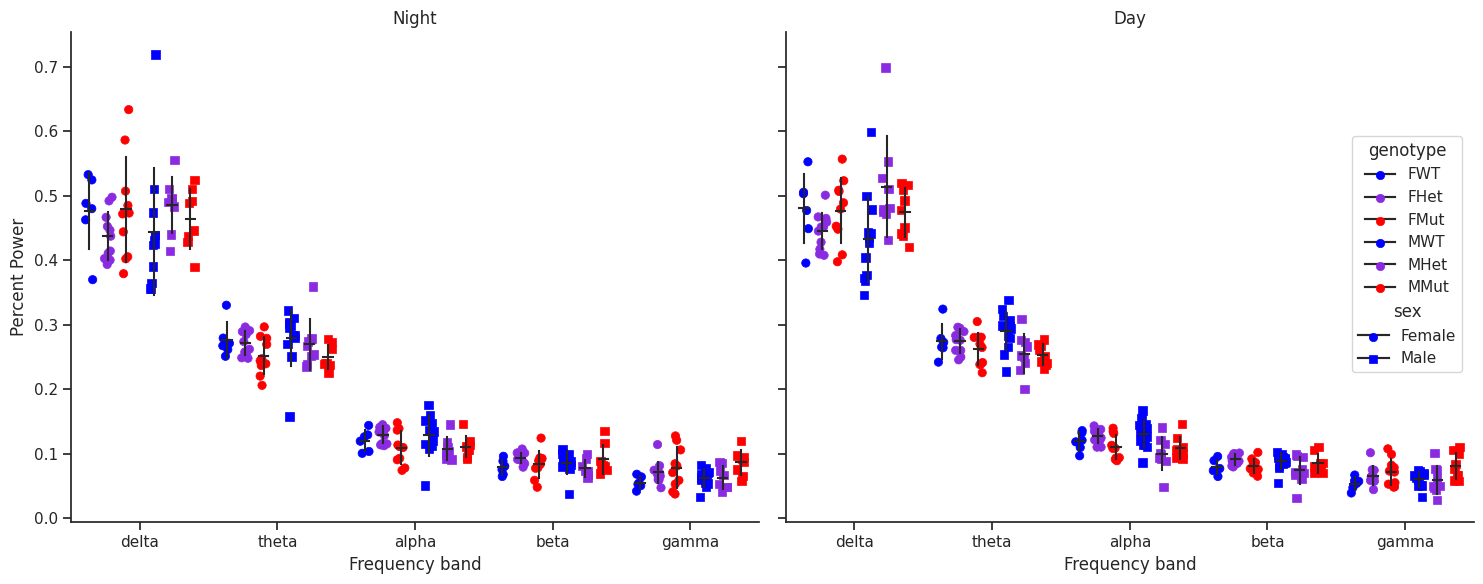

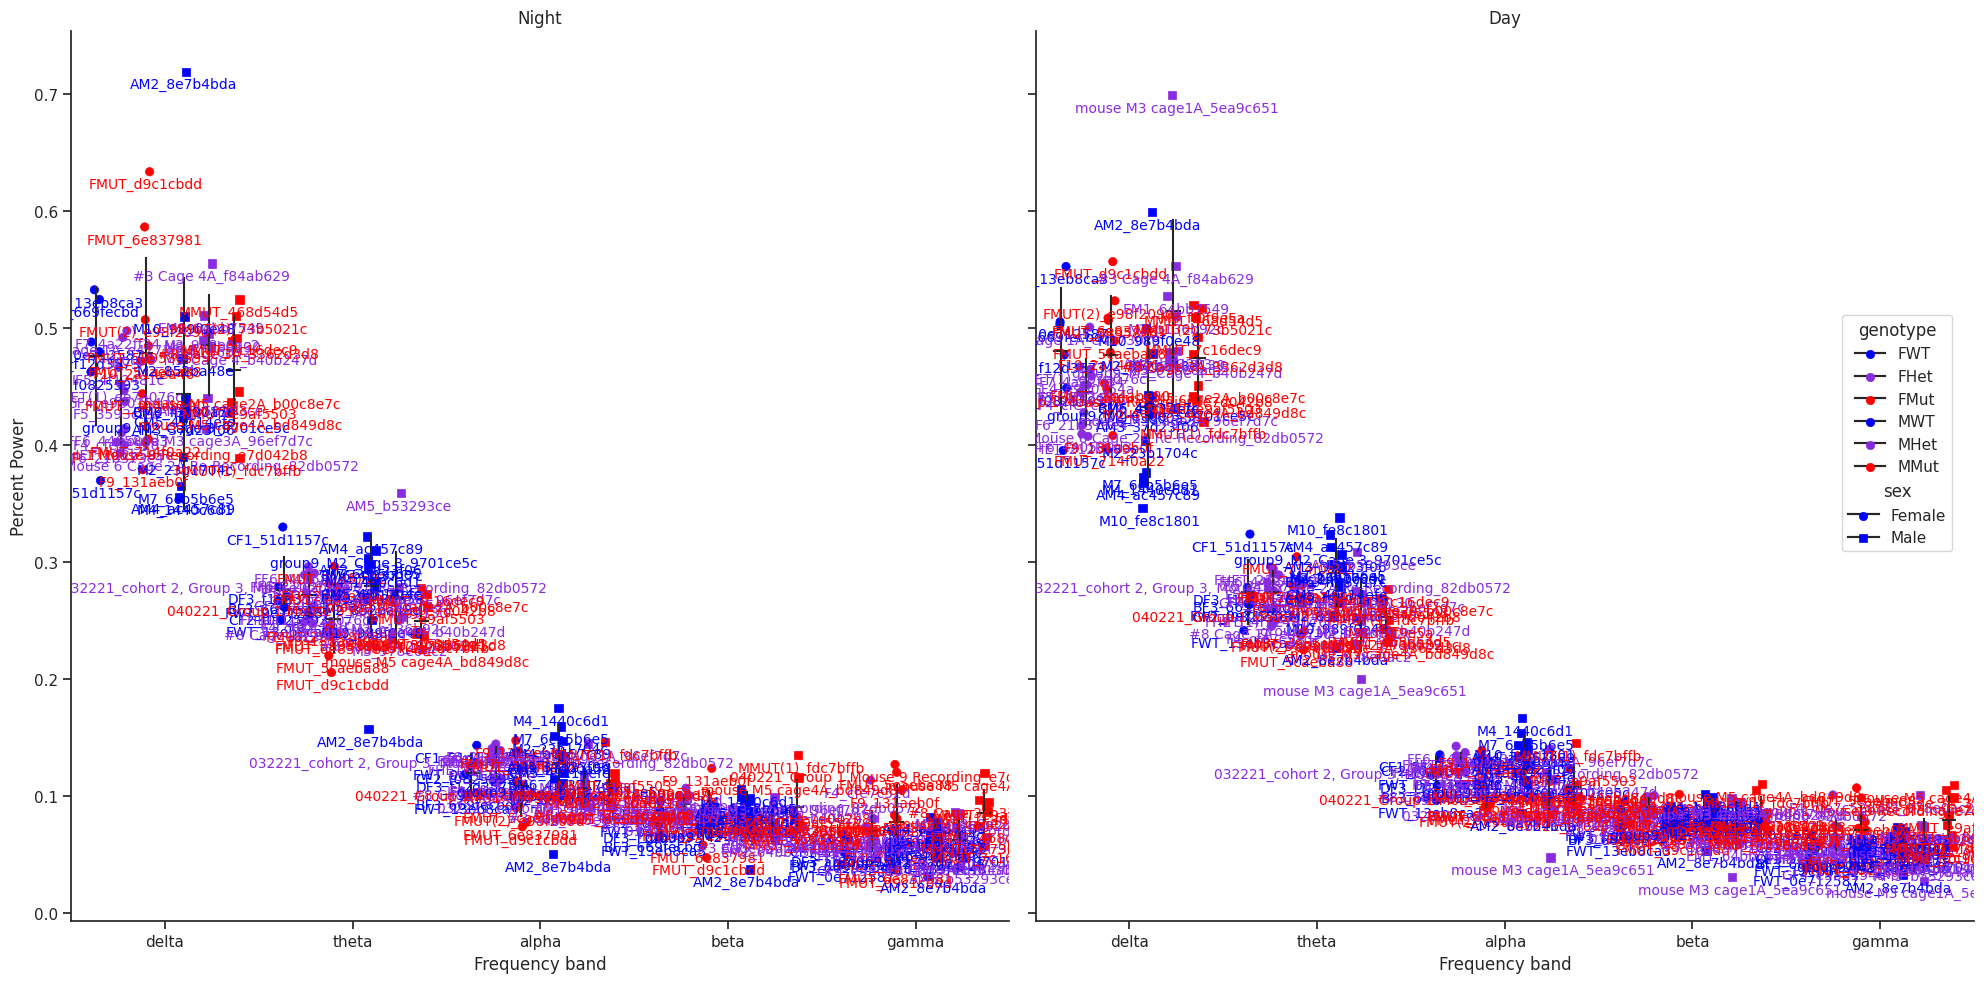

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:179: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/tmp/ipykernel_3992468/3955361158.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(groupby).agg({feature: lambda x: np.nanmean(x), "genotype": "first"}).reset_index()
/tmp/ipykernel_3992468/3955361158.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  animal_counts = df.groupby(['gene', 'sex'])['animal'].nunique()
/tmp/ipykernel_3992468/3955361158.py:52: FutureWarning: The default value of observed=False is deprecated and will c


Number of animals per gene/sex group:
gene  sex   
WT    Female     6
      Male      13
Het   Female    11
      Male       9
Mut   Female    10
      Male       9
Name: animal, dtype: int64


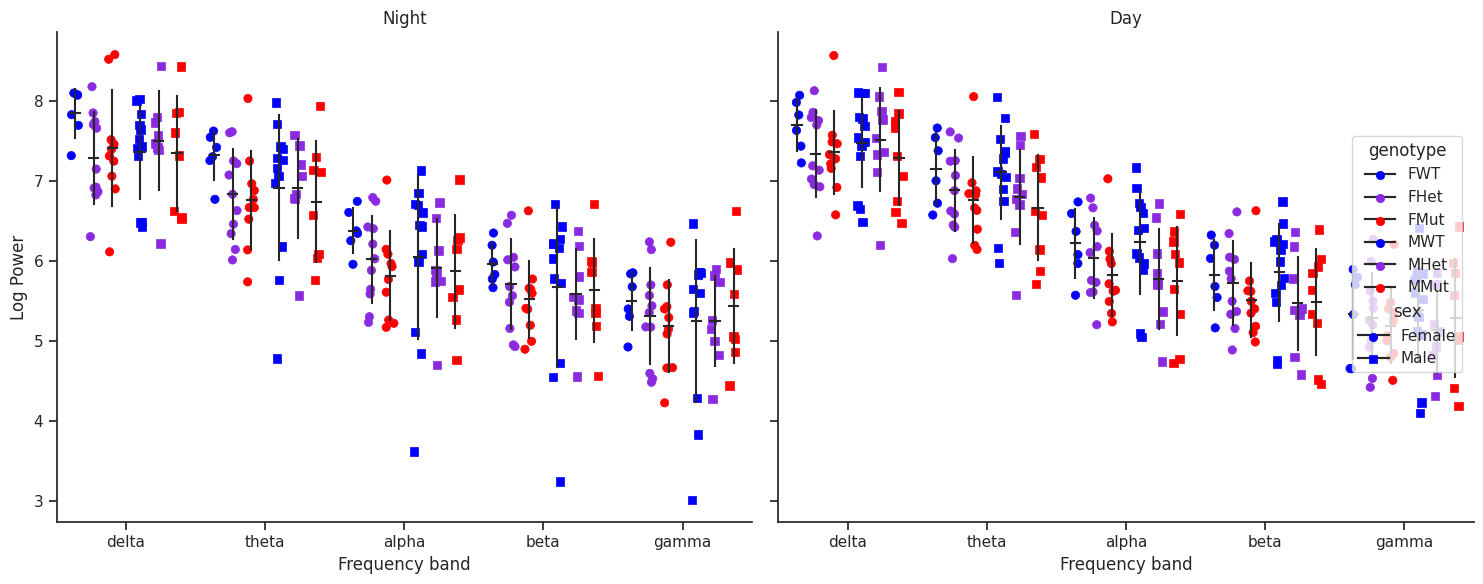

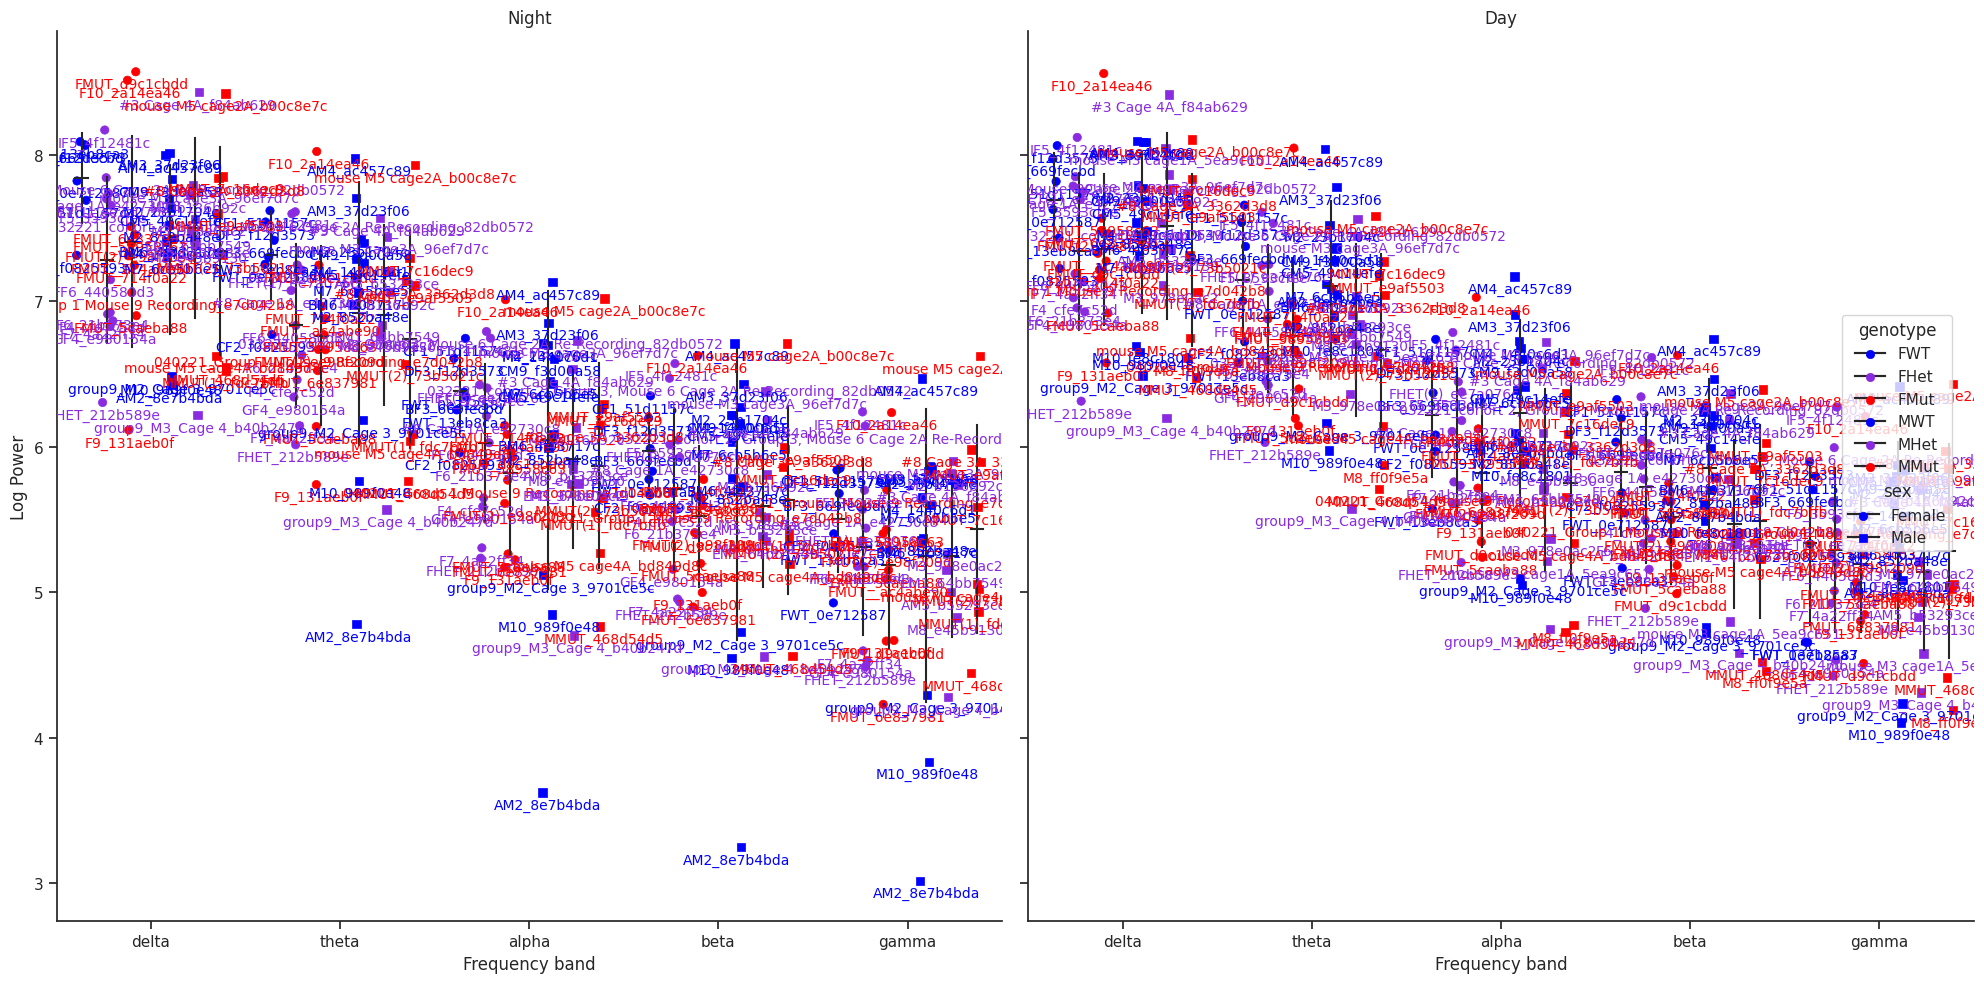

In [65]:
import matplotlib as mpl
import seaborn as sns
import seaborn.objects as so
import pingouin as pg
from okabeito import black, blue, green, lightblue, orange, purple, red, yellow
from seaborn import axes_style

logger.setLevel(logging.INFO)

# features = ['psdtotal', 'psdslope', 'logpsdtotal']
features = ["pcorr", "cohere", "psdfrac", "logpsdband"]
# features = ["psdfrac", "logpsdband"]
for feature in features:
    df = ep.pull_timeseries_dataframe(feature=feature, groupby=["animal", "genotype", "isday"], collapse_channels=True)
    if feature == "psdfrac" or feature == "logpsdband":
        groupby = ["animal", "isday", "band"]
        band_order = ["delta", "theta", "alpha", "beta", "gamma"]
        df["band"] = pd.Categorical(df["band"], categories=band_order, ordered=True)
    else:
        groupby = ["animal", "isday"]
    df = df.groupby(groupby).agg({feature: lambda x: np.nanmean(x), "genotype": "first"}).reset_index()

    genotype_order = ["FWT", "FHet", "FMut", "MWT", "MHet", "MMut"]
    gene_order = ["WT", "Het", "Mut"]

    df["genotype"] = pd.Categorical(df["genotype"], categories=genotype_order, ordered=True)
    df["sex"] = df["genotype"].map(
        lambda x: "Male" if x in ["MWT", "MHet", "MMut"] else "Female" if x in ["FWT", "FHet", "FMut"] else None
    )
    df["gene"] = df["genotype"].map(
        lambda x: "WT"
        if x in ["MWT", "FWT"]
        else "Het"
        if x in ["MHet", "FHet"]
        else "Mut"
        if x in ["MMut", "FMut"]
        else x
    )
    df["gene"] = pd.Categorical(df["gene"], categories=gene_order, ordered=True)
    df["isday"] = df["isday"].map(lambda x: "Day" if x else "Night")

    if feature == "psdfrac" or feature == "logpsdband":
        df = df.sort_values(["band", "genotype", "gene", "sex"])
    else:
        df = df.sort_values(["genotype", "gene", "sex"])

    # Count number of distinct animals per gene/sex group
    animal_counts = df.groupby(['gene', 'sex'])['animal'].nunique()
    print("\nNumber of animals per gene/sex group:")
    print(animal_counts)
    # display(df)
    df_pivot = df.pivot_table(
        index=["animal", "gene", "sex"],
        columns="isday" if feature == "cohere" or feature == "pcorr" else ['isday', "band"],
        values=feature,
        aggfunc="first",
    ).reset_index()
    if isinstance(df_pivot.columns, pd.MultiIndex):
        df_pivot.columns = ["-".join(str(x) for x in col if x != "") if isinstance(col, tuple) else col for col in df_pivot.columns]
    df_pivot.columns.name = None
    # display(df_pivot)

    if save_files:
        df.to_csv(save_folder / f"{feature}.csv")
        df_pivot.to_csv(save_folder / f"{feature}-pivot.csv")
    # continue

    if feature == "cohere" or feature == "pcorr":
        continue
        p = (
            so.Plot(df, x="gene", y=feature, color="sex", marker="sex")
            .facet(col="isday")
            .add(so.Dash(color="k"), so.Agg(), so.Dodge(empty="drop", gap=0.2))
            .add(so.Line(color="k", linestyle="--", marker=""), so.Agg(), so.Dodge(empty="drop", gap=0.2))
            .add(so.Range(color="k"), so.Est(errorbar="sd"), so.Dodge(empty="drop", gap=0.2))
            .add(so.Dot(), so.Dodge(empty="drop", gap=0.2), so.Jitter(0.5, seed=42))
            .add(
                so.Text(valign="top", fontsize=10),
                so.Dodge(empty="drop", gap=0.2),
                so.Jitter(0.5, seed=42),
                text="animal",
            )
            .theme(axes_style("ticks") | sns.plotting_context("notebook"))
            .layout(size=(20, 10))
        )
        if save_files:
            p.save(save_folder / f"{feature}.png", bbox_inches="tight")
        else:
            p.show()
    elif feature == "psdfrac" or feature == "logpsdband":
        p = (
            so.Plot(df, x="band", y=feature, color="genotype", marker='sex')
            .facet(col="isday")
            .add(so.Dash(color="k"), so.Agg(), so.Dodge())
            .add(so.Range(color="k"), so.Est(errorbar="sd"), so.Dodge())
            .add(so.Dot(), so.Dodge(), so.Jitter(1, seed=42))
            # .add(
            #     so.Text(valign="top", fontsize=10),
            #     so.Dodge(),
            #     so.Jitter(seed=42),
            #     text="animal",
            # )
            .scale(marker=so.Nominal(['o', 's'], order=['Female', 'Male']))
            .theme(
                axes_style("ticks")
                | sns.plotting_context("notebook")
                | {"axes.prop_cycle": plt.cycler(color=["blue", "blueviolet", "red", "blue", "blueviolet", "red"])}
                | {"axes.spines.right": False, "axes.spines.top": False}
            )
            .label(x="Frequency band", y='Percent Power' if feature == 'psdfrac' else 'Log Power')
        )
        p1 = p.layout(size=(15, 6), engine="tight")
        p2 = p.add(
            so.Text(valign="top", fontsize=10),
            so.Dodge(),
            so.Jitter(seed=42),
            text="animal",
        ).layout(size=(20, 10), engine="tight")

        if save_files:
            p1.save(save_folder / f"byband-{feature}.png", bbox_inches="tight")
            p2.save(save_folder / f"byband-{feature}-text.png", bbox_inches="tight")
        else:
            p1.show()
            p2.show()
        continue
        with mpl.rc_context(plt.style.library["bmh"] | sns.plotting_context("notebook")):
            p = (
                so.Plot(df, x="gene", y=feature, color="band")
                # .facet(col="isday", row="sex")
                .facet(col="isday")
                .add(so.Dash(color="k"), so.Agg(), so.Dodge())
                .add(so.Range(color="k"), so.Est(errorbar="sd"), so.Dodge())
                .add(so.Dot(), so.Dodge(), so.Jitter(seed=42), marker="sex")
                # .theme(plt.style.library['bmh'])
                .theme(
                    {"axes.prop_cycle": plt.cycler(color=[blue, orange, red, green, purple, yellow, lightblue, black])}
                )
                .layout(size=(10, 6), engine="tight")
                .label(x="Genotype", y=str.capitalize)
            )
            if save_files:
                p.save(save_folder / f"bygeno-{feature}.png", bbox_inches="tight")
            else:
                p.show()

In [34]:
pg.mixed_anova(df, dv='psdfrac', within='isday', between=['band', 'sex', 'gene'], subject='animal')
# df


ValueError: within and between factors must both be strings referring to a column in the data. Specifying multiple within and between factors is currently not supported. For more information, see: https://github.com/raphaelvallat/pingouin/issues/136

In [15]:
# for feat in constants.LINEAR_FEATURE + ['psdband']:
#     logging.info(f'pulling {feat}')
#     df = ep._pull_timeseries_dataframe(feat, 'animal')
#     # display(df)
#     # ep.plot_boxplot_2(feat, ['genotype', 'animalday'], collapse_channels=False)
#     ep.plot_catplot(feat, 'animal', kind='violin')

# ep.plot_catplot('psdband', ['animal', 'isday', 'animalday'], 
#                 x='animal',
#                 col='isday',
#                 hue='band',
#                 kind='boxen',
#                 collapse_channels=False,
#                 catplot_params={'showfliers': False})

In [16]:
# for feat in ['cohere']:
#     logging.info(f'pulling {feat}')
#     df = ep._pull_timeseries_dataframe(feat, ['animal', 'isday'])
#     ep.plot_2d_feature_2(feat, ['animal', 'isday'], row='band')

In [ ]:
ep.plot_heatmap('cohere', groupby=['animalday', 'isday'])
ep.plot_heatmap('cohere', groupby='animalday', col='band', row='animalday')

ep.plot_heatmap('pcorr', groupby=['genotype', 'isday'])
ep.plot_heatmap('pcorr', groupby='genotype')

KeyboardInterrupt: 

2025-06-11 22:19:22,257 - DEBUG - groups: ['KO', 'WT']
2025-06-11 22:19:22,276 - DEBUG - vals.shape: (1, 10)
2025-06-11 22:19:22,282 - DEBUG - vals.shape: (1, 10)
2025-06-11 22:19:22,286 - DEBUG - vals.shape: (1, 10)
2025-06-11 22:19:22,749 - DEBUG - groups: ['KO', 'WT']
2025-06-11 22:19:22,750 - DEBUG - vals.shape: (1,)
2025-06-11 22:19:22,751 - DEBUG - vals.shape: (1,)
2025-06-11 22:19:22,753 - DEBUG - vals.shape: (1,)
2025-06-11 22:19:22,924 - DEBUG - groups: [('KO', True), ('WT', True)]
2025-06-11 22:19:22,925 - DEBUG - vals.shape: (1, 10)
2025-06-11 22:19:22,927 - DEBUG - vals.shape: (1, 10)
2025-06-11 22:19:22,928 - DEBUG - vals.shape: (1, 10)
2025-06-11 22:19:23,306 - DEBUG - groups: [('KO', True), ('WT', True)]
2025-06-11 22:19:23,307 - DEBUG - vals.shape: (1,)
2025-06-11 22:19:23,309 - DEBUG - vals.shape: (1,)
2025-06-11 22:19:23,311 - DEBUG - vals.shape: (1,)
2025-06-11 22:19:23,512 - DEBUG - groups: ['KO', 'WT']
2025-06-11 22:19:23,513 - DEBUG - vals.shape: (1, 10)
2025-06-1

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


2025-06-11 22:19:29,765 - DEBUG - groups: ['KO', 'WT']
2025-06-11 22:19:29,770 - DEBUG - vals.shape: (1,)
2025-06-11 22:19:29,772 - DEBUG - vals.shape: (1,)
2025-06-11 22:19:29,774 - DEBUG - vals.shape: (1,)
2025-06-11 22:19:30,006 - DEBUG - groups: [('KO', True), ('WT', True)]
2025-06-11 22:19:30,008 - DEBUG - vals.shape: (1, 10)
2025-06-11 22:19:30,010 - DEBUG - vals.shape: (1, 10)
2025-06-11 22:19:30,014 - DEBUG - vals.shape: (1, 10)
2025-06-11 22:19:30,484 - DEBUG - groups: [('KO', True), ('WT', True)]
2025-06-11 22:19:30,485 - DEBUG - vals.shape: (1,)
2025-06-11 22:19:30,486 - DEBUG - vals.shape: (1,)
2025-06-11 22:19:30,488 - DEBUG - vals.shape: (1,)
2025-06-11 22:19:30,720 - DEBUG - groups: ['KO', 'WT']
2025-06-11 22:19:30,721 - DEBUG - vals.shape: (1, 10, 2)
2025-06-11 22:19:30,723 - DEBUG - vals.shape: (1, 10, 2)
2025-06-11 22:19:30,725 - DEBUG - vals.shape: (1, 10, 2)
2025-06-11 22:19:31,130 - DEBUG - groups: ['KO', 'WT']
2025-06-11 22:19:31,131 - DEBUG - vals.shape: (1, 2)
2

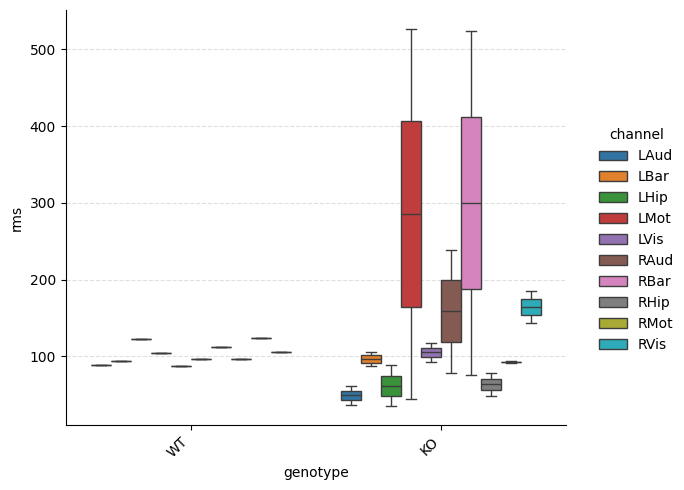

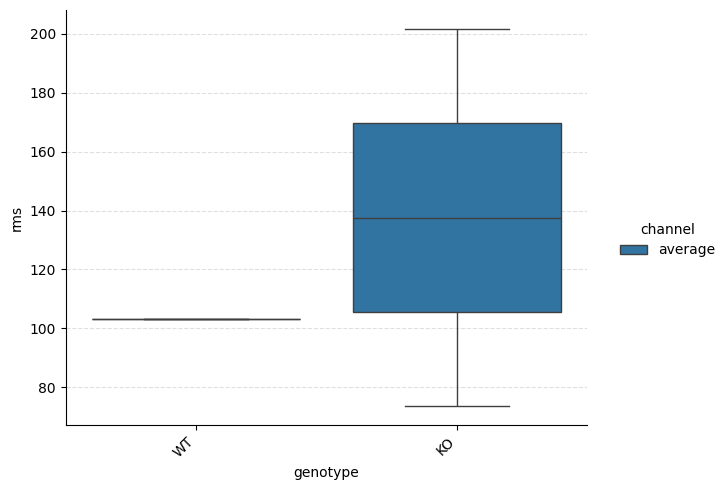

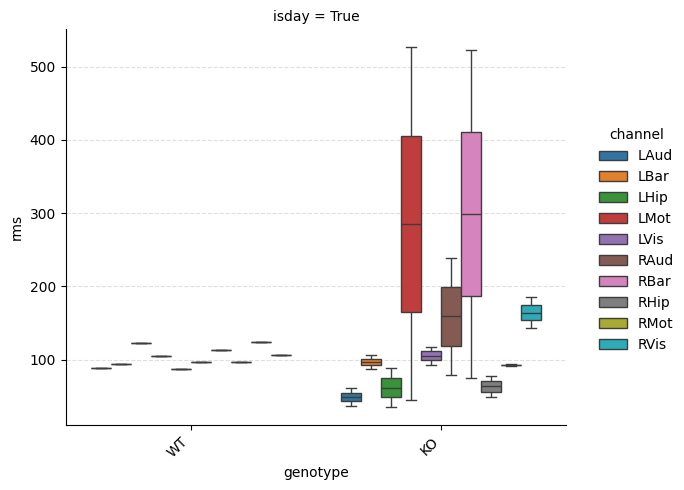

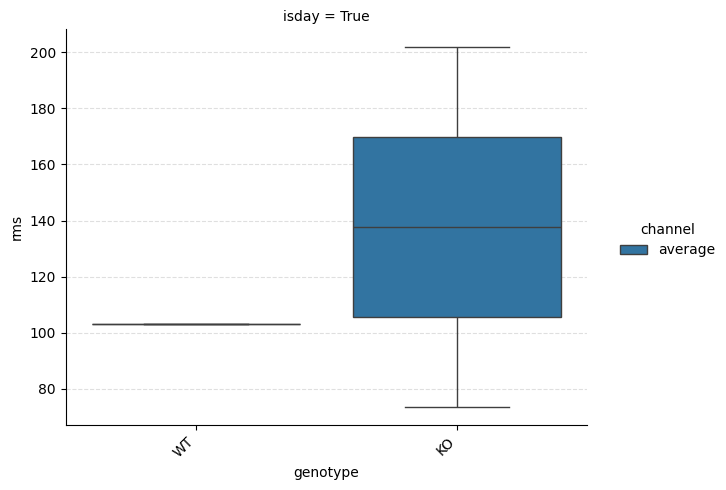

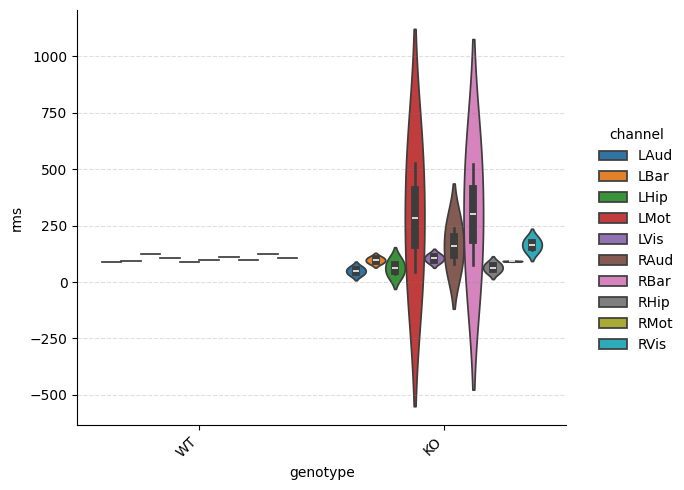

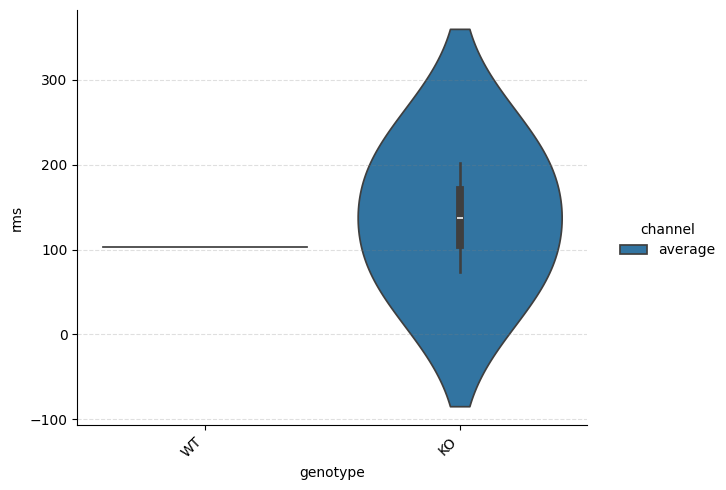

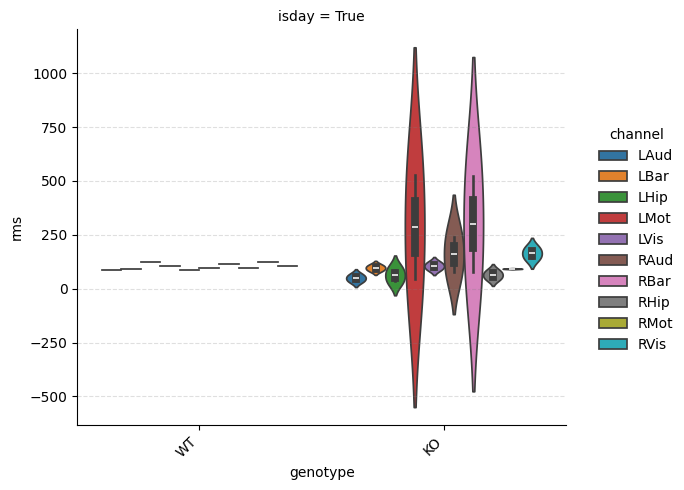

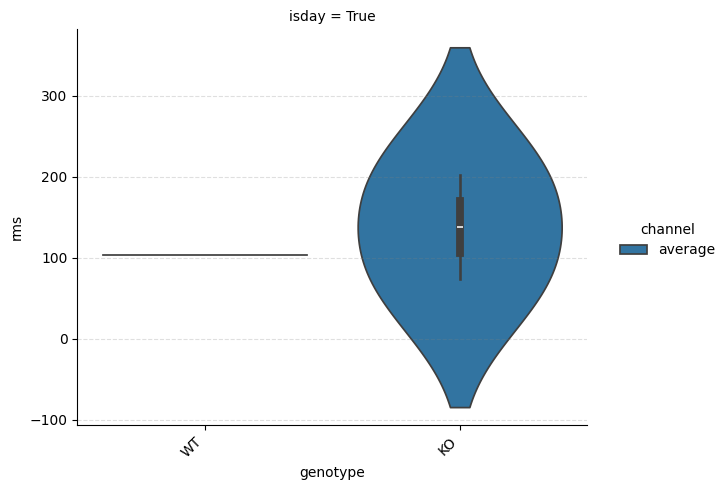

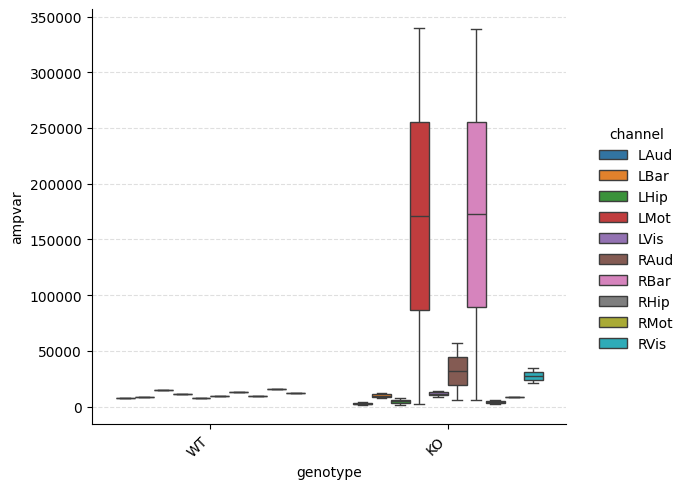

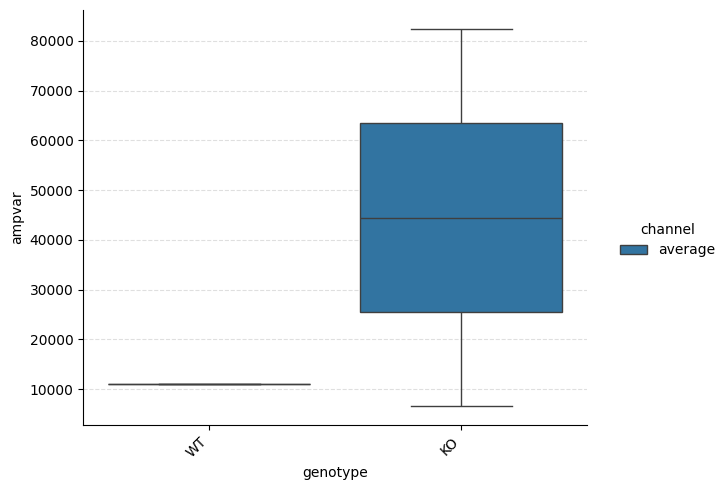

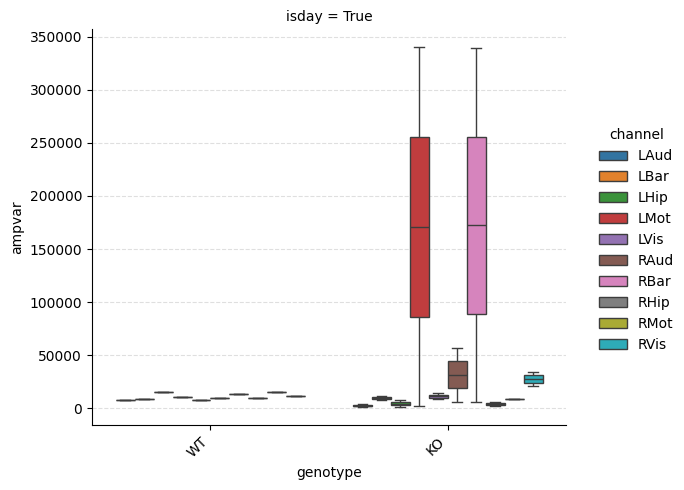

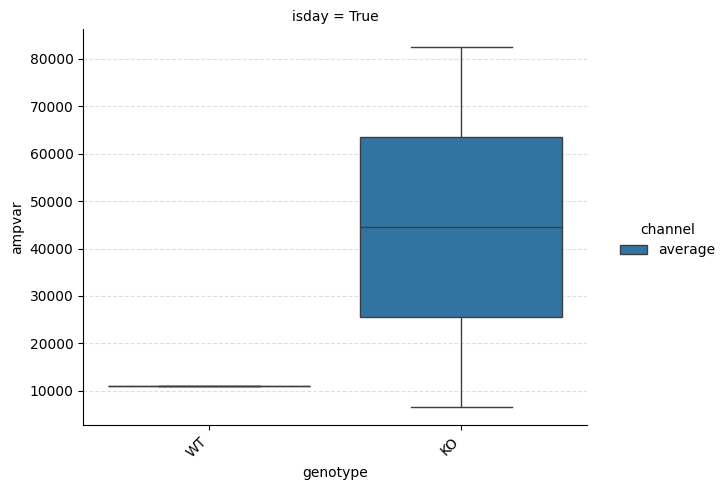

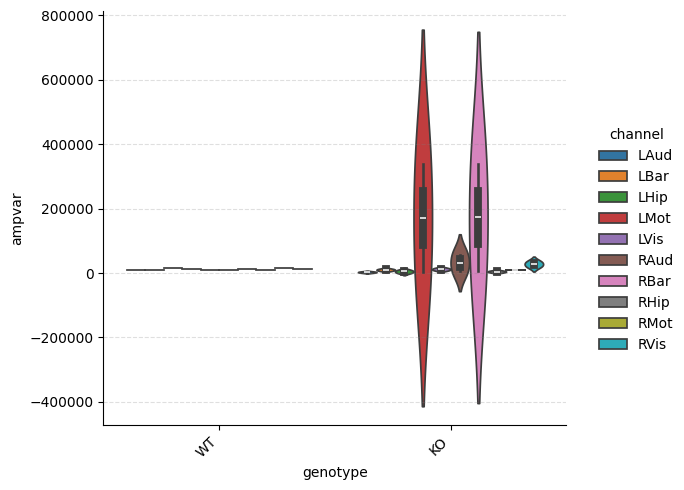

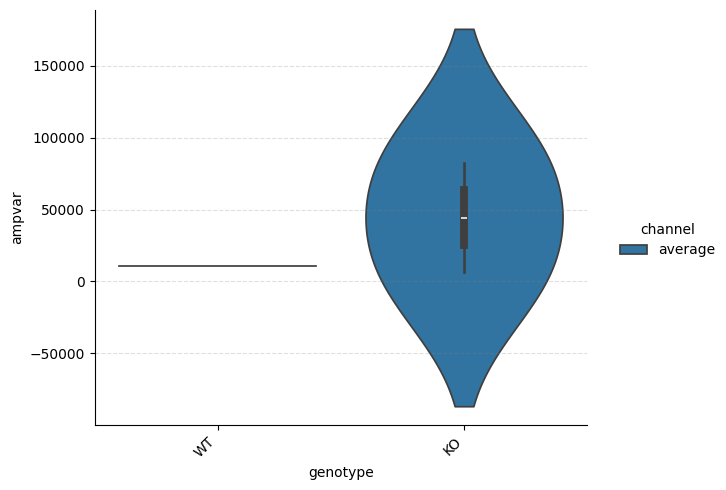

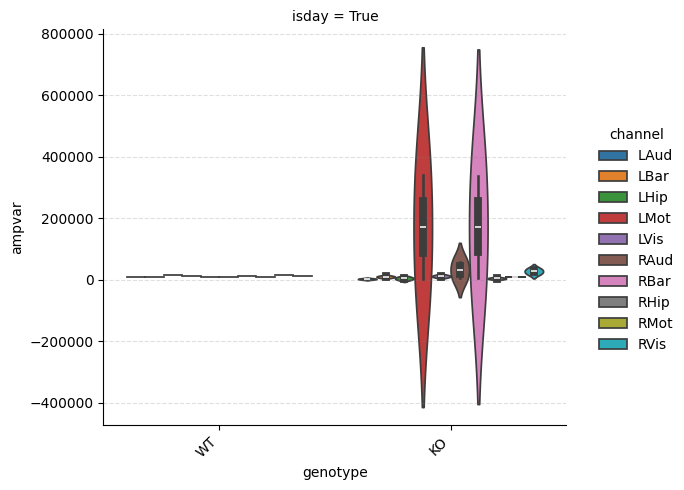

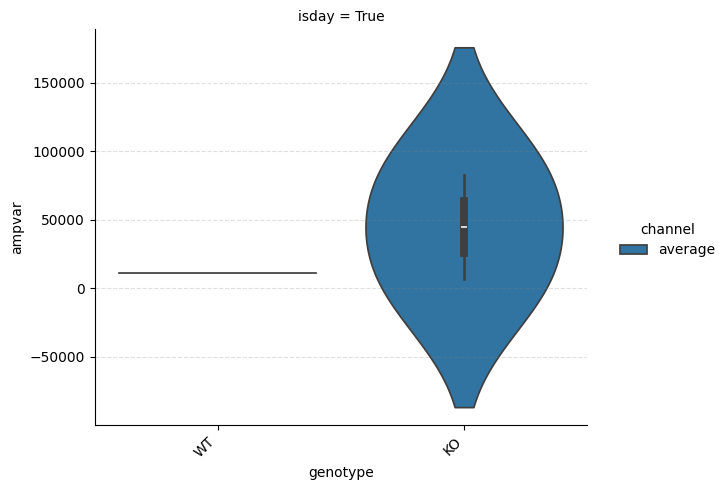

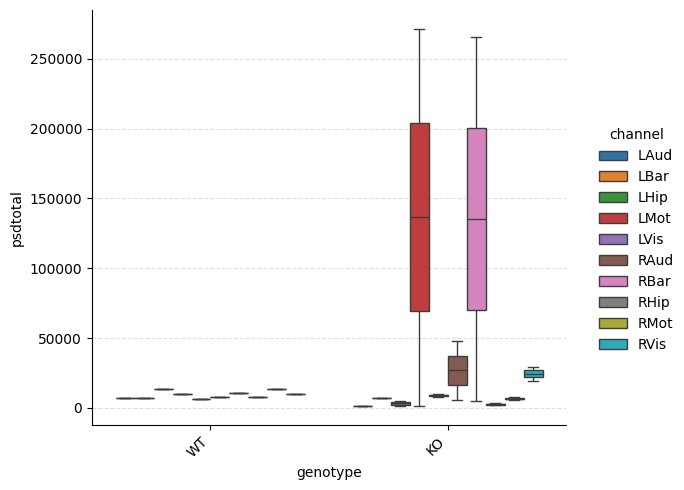

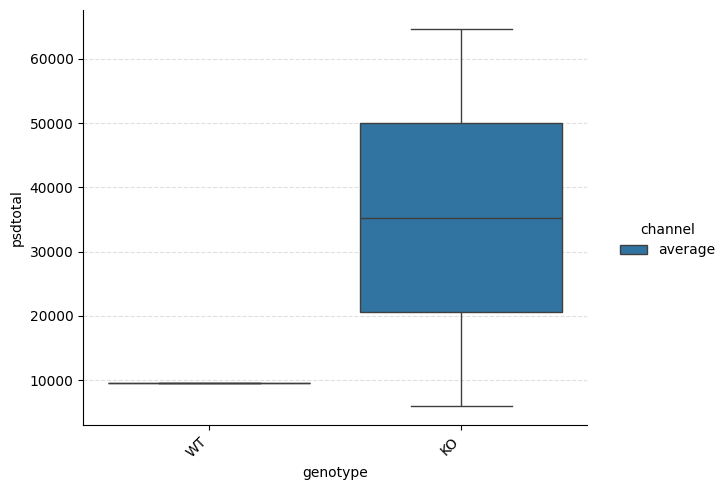

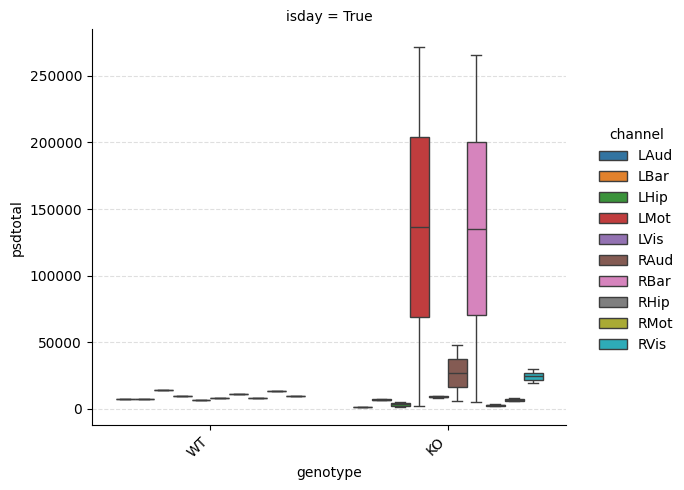

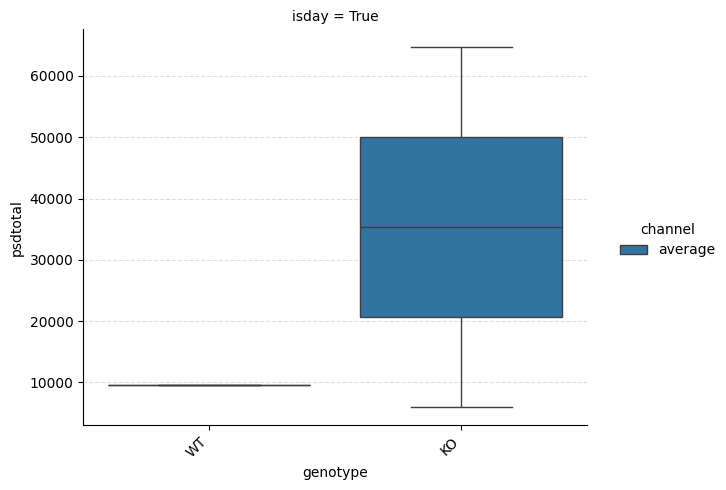

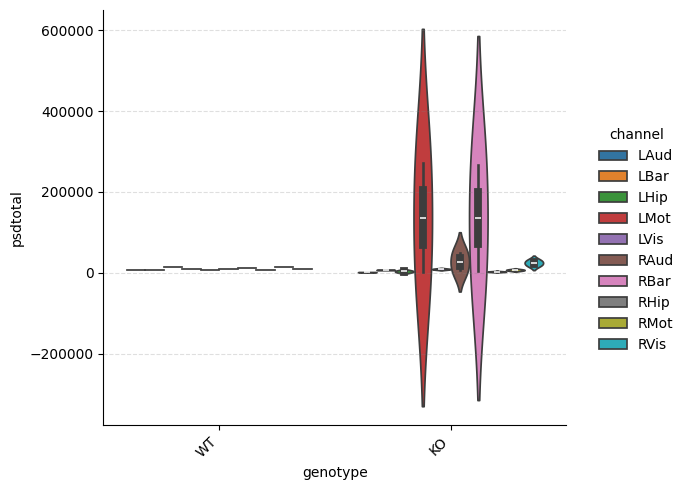

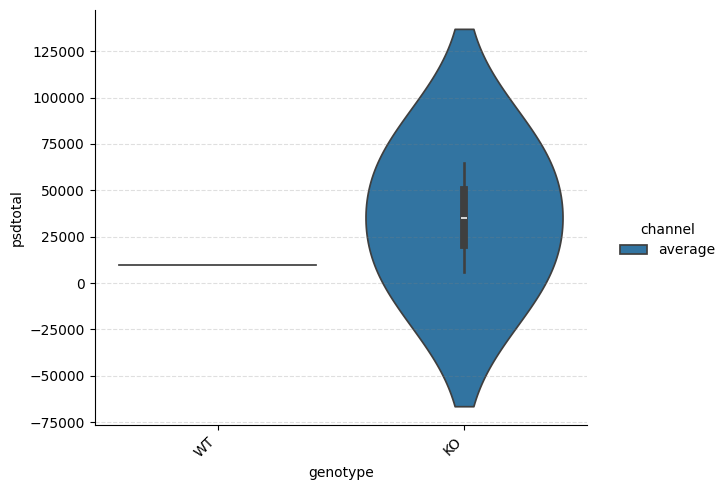

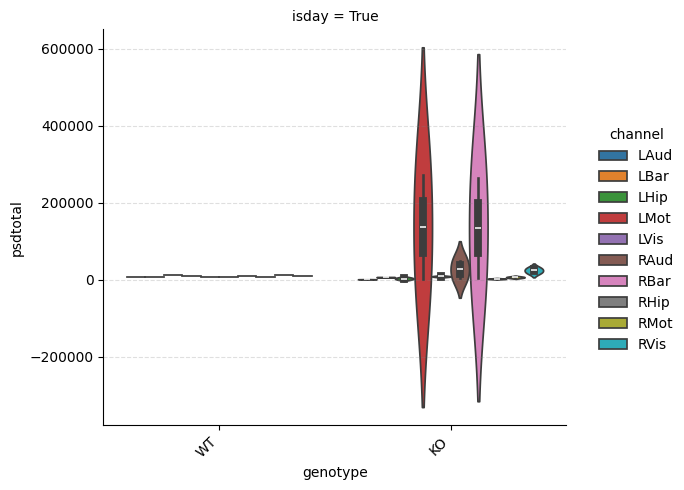

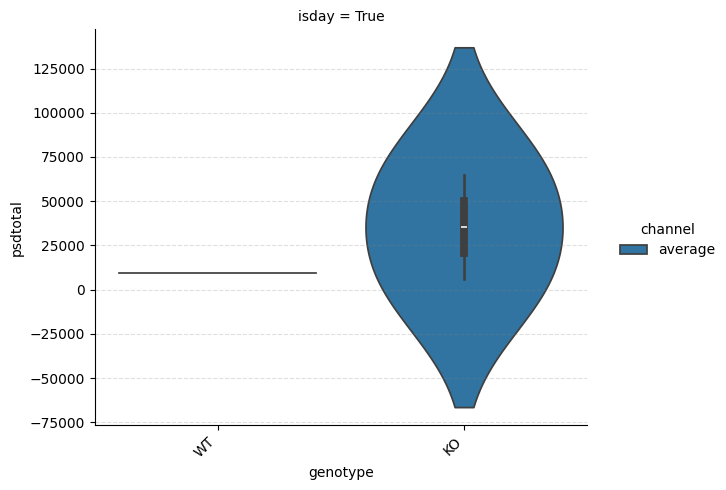

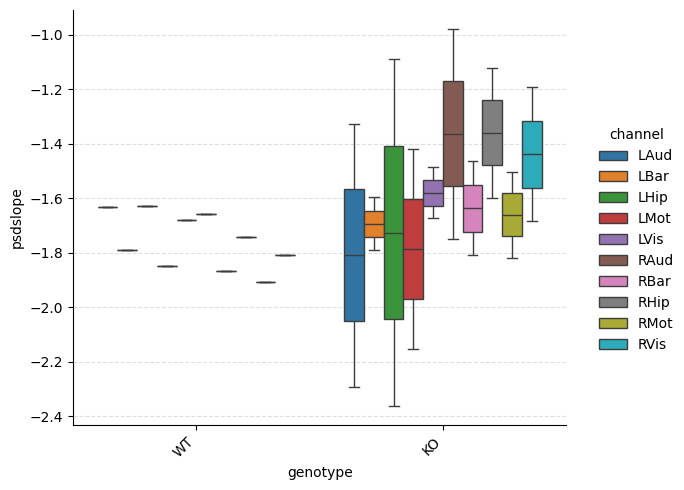

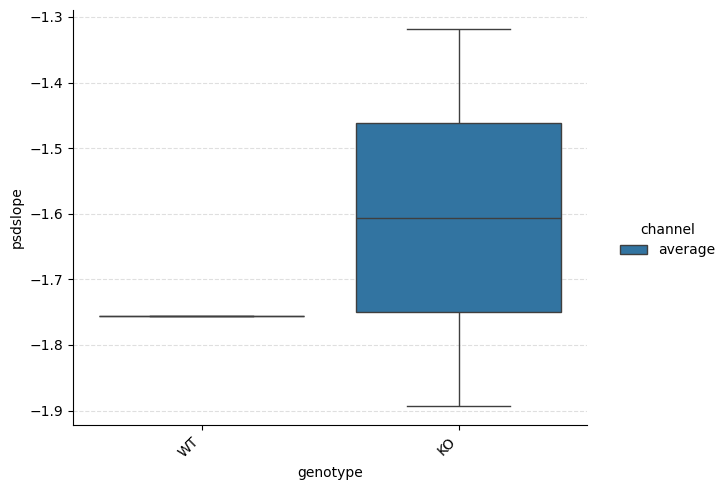

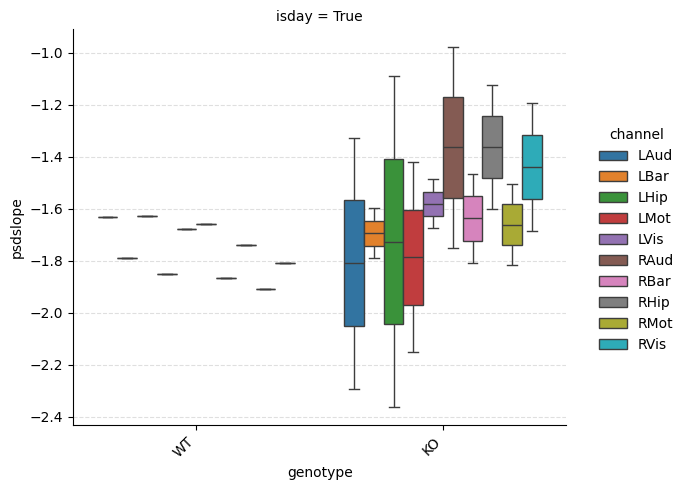

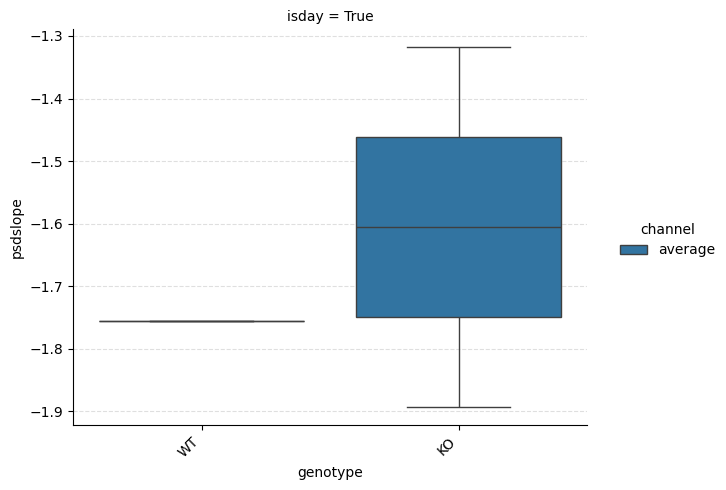

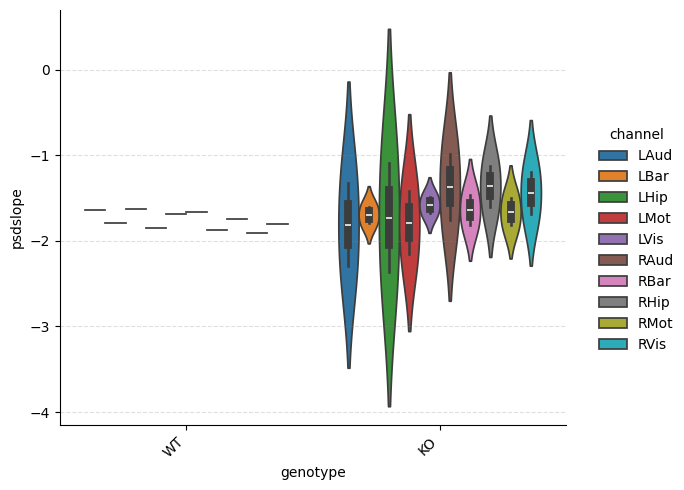

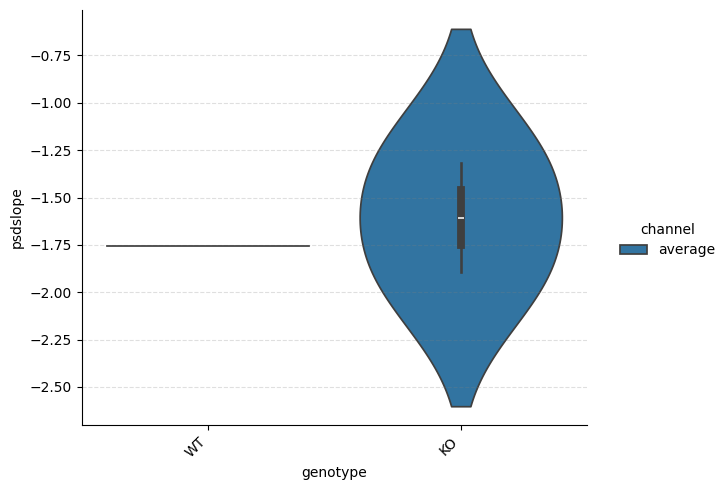

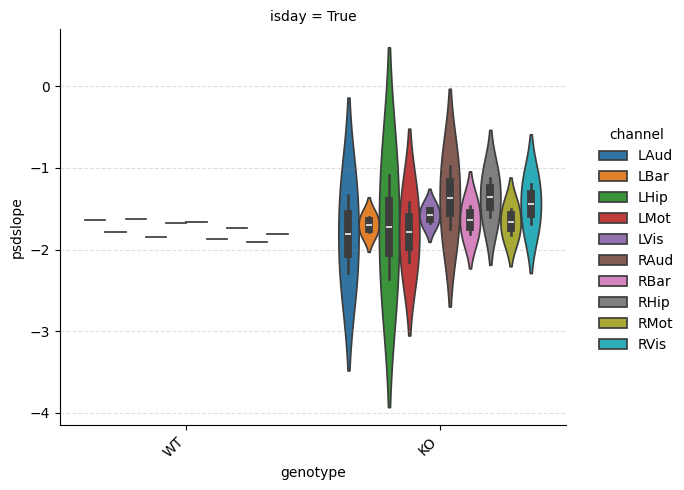

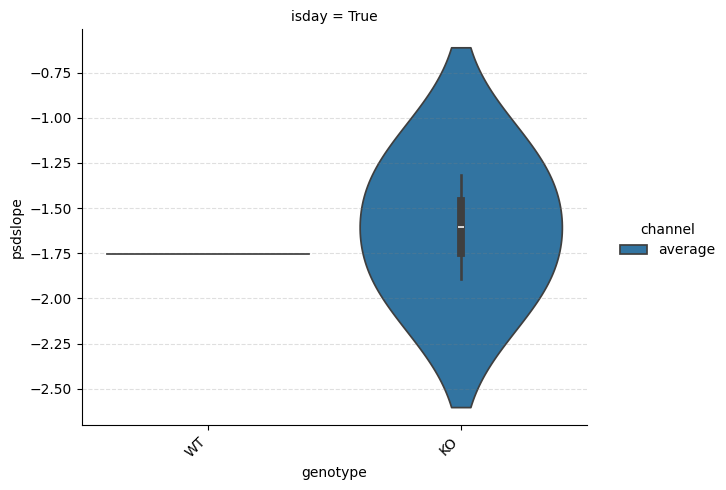

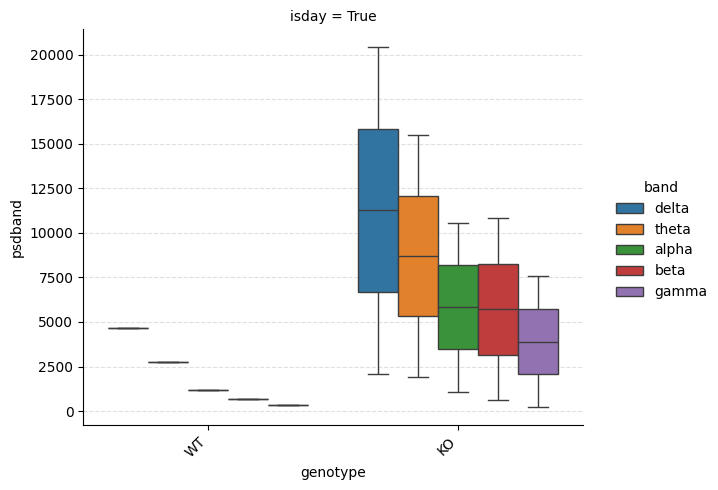

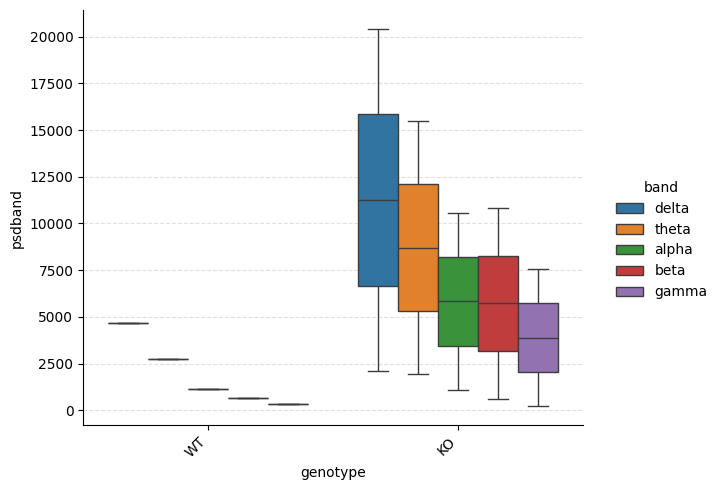

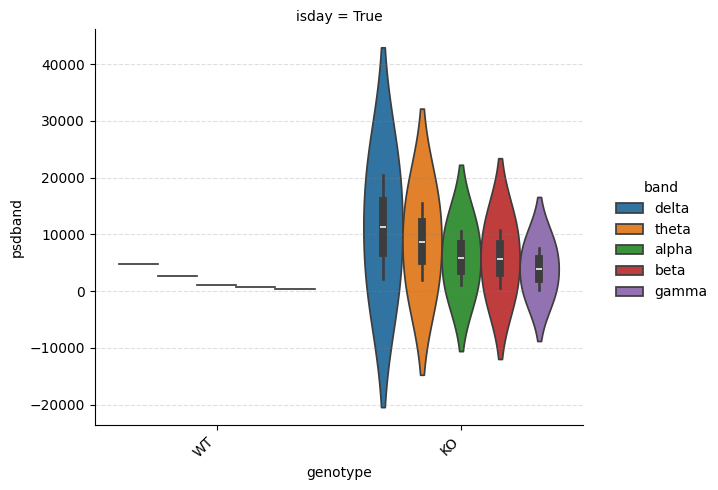

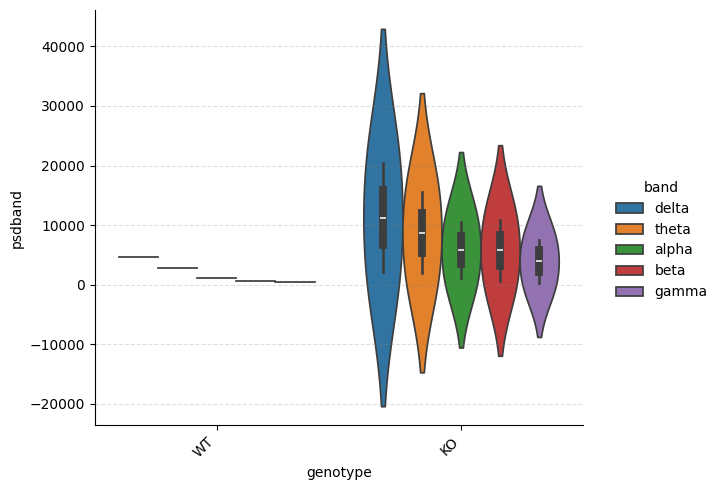

In [18]:
for feature in constants.LINEAR_FEATURES:
    if feature in ['nspike', 'psdfrac', 'logrms', 'logampvar', 'logpsdtotal', 'lognspike', 'logpsdband', 'logpsdfrac']:
        print(f"Skipping feature {feature}")
        continue
    for kind in ['box', 'violin']:
        for groupby in ['genotype', ['genotype', 'isday']]:
            for collapse in [False, True]:
                ep.plot_catplot(feature, groupby=groupby, kind=kind, collapse_channels=collapse)
for kind in ['box', 'violin']:
    ep.plot_catplot('psdband', groupby=['genotype', 'isday'], 
                    x='genotype',
                    col='isday',
                    hue='band',
                    kind=kind, collapse_channels=True)
    ep.plot_catplot('psdband', groupby=['genotype'], 
                    x='genotype',
                    hue='band',
                    kind=kind, collapse_channels=True)

2025-06-11 22:19:40,419 - DEBUG - groups: ['A10', 'A5', 'F22']
2025-06-11 22:19:40,420 - DEBUG - vals.shape: (1, 10)
2025-06-11 22:19:40,422 - DEBUG - vals.shape: (1, 10)
2025-06-11 22:19:40,424 - DEBUG - vals.shape: (1, 10)


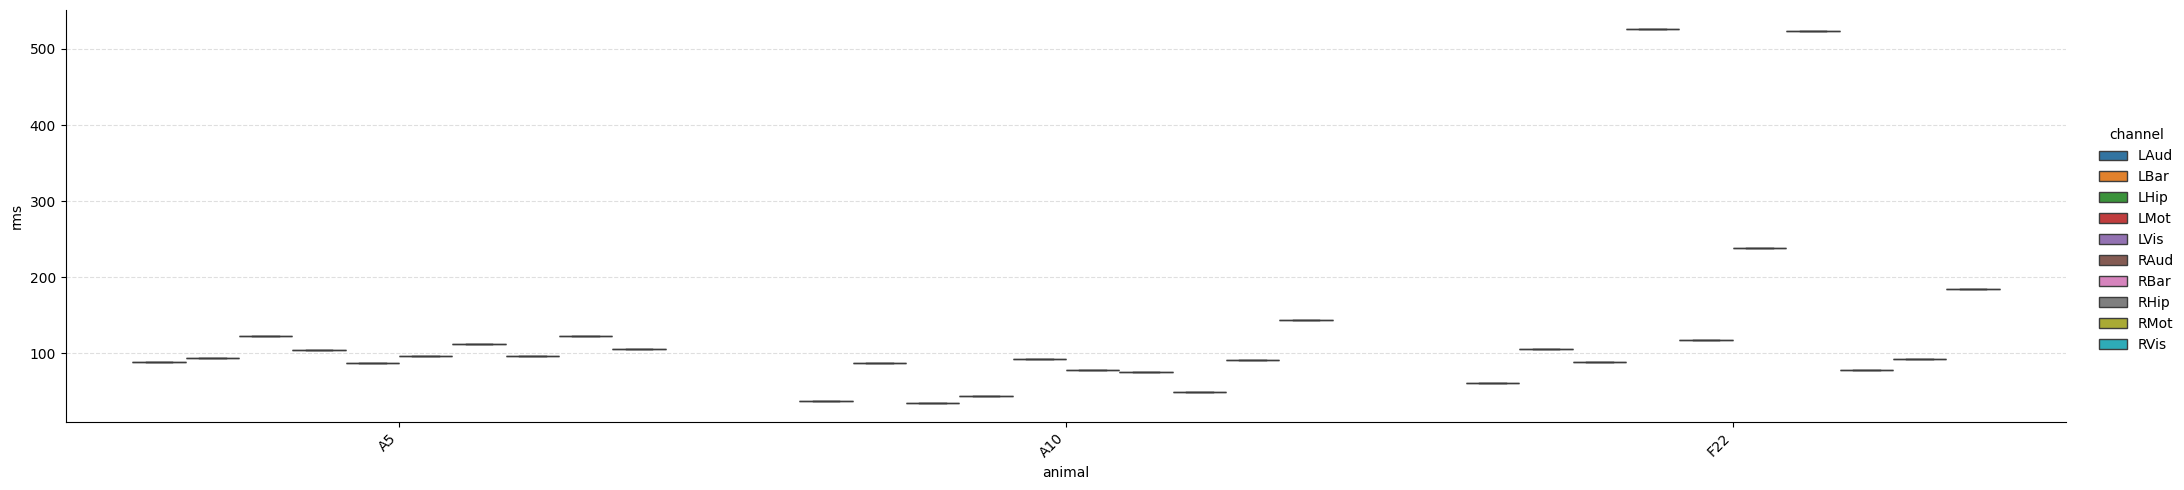

In [19]:
ep.plot_catplot('rms', groupby='animal', kind='box', catplot_params={'showfliers': False, 'aspect': 4})

2025-06-11 22:19:41,010 - DEBUG - groups: ['A10', 'A5', 'F22']
2025-06-11 22:19:41,011 - DEBUG - vals.shape: (1, 10, 10)
2025-06-11 22:19:41,013 - DEBUG - vals.shape: (1, 10, 10)
2025-06-11 22:19:41,014 - DEBUG - vals.shape: (1, 10, 10)
2025-06-11 22:19:41,174 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f6cdfaaf6d0>
2025-06-11 22:19:41,196 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f6cdfaf3280>
2025-06-11 22:19:41,219 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f6cdf970a90>
2025-06-11 22:19:41,458 - DEBUG - groups: ['A10', 'A5', 'F22']
2025-06-11 22:19:41,459 - DEBUG - vals.shape: (1, 5, 10, 10)
2025-06-11 22:19:41,460 - DEBUG - vals.shape: (1, 5, 10, 10)
2025-06-11 22:19:41,461 - DEBUG - vals.shape: (1, 5, 10, 10)
2025-06-11 22:19:41,462 - DEBUG - vals.shape: (1, 5, 10, 10)
2025-06-11 22:19:41,463 - DEBUG - vals.shape: (1, 5, 10, 10)
2025-06-11 22:19:41,464 - DEBUG - vals.shape: (1, 5, 10, 10)
2025-06-11 22:19:42,198 - DEBUG - 

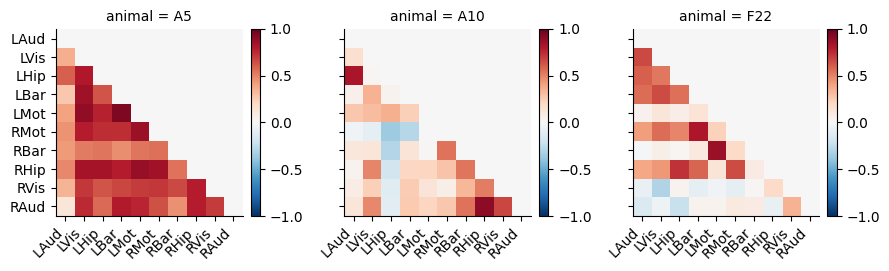

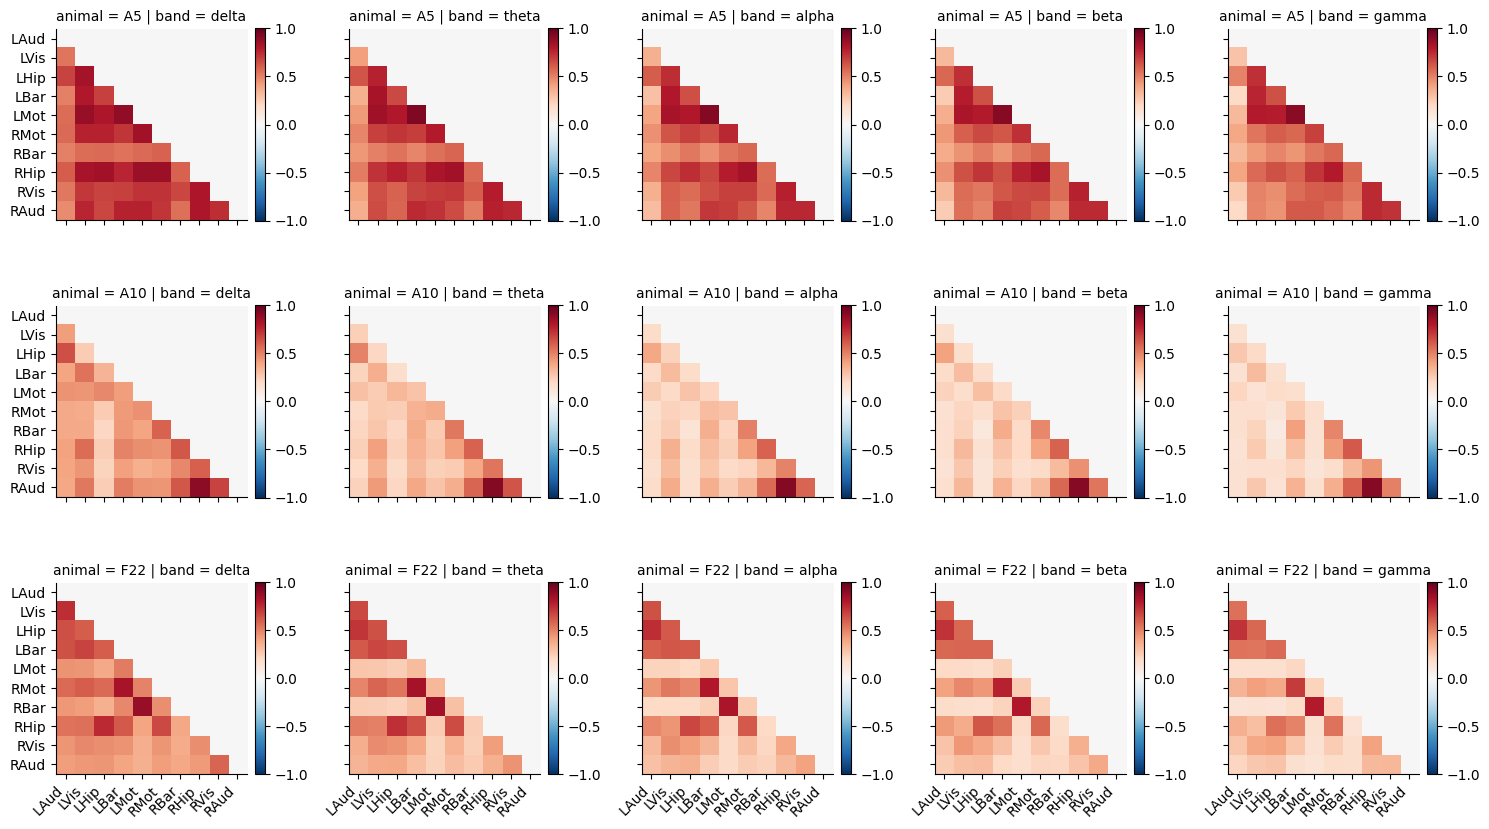

In [20]:
ep.plot_heatmap('pcorr', groupby='animal')
ep.plot_heatmap('cohere', groupby='animal', col='band', row='animal')

In [21]:
logger.setLevel(logging.DEBUG)

In [22]:
for e in sar:
    e.convert_to_mne(chunk_len=1440)
    e.save_fif_and_json(Path(f'./test-mnes/{e.animal_day}').resolve(), overwrite=True)

NameError: name 'sar' is not defined

In [17]:
reconstruct_sas = visualization.SpikeAnalysisResult.load_fif_and_json('./test-mnes/A5 WT Dec-12-2023')
mne_obj = reconstruct_sas.result_mne

Opening raw data file test-mnes/A5 WT Dec-12-2023/A5-WT-A5 WT Dec-12-2023-raw.fif...
    Reading extended channel information
Isotrak not found
    Range : 0 ... 40067758 =      0.000 ... 40067.758 secs
Ready.
2025-03-21 21:23:35,173 - INFO - Channel names: 	['Intan Input (1)/PortB L Aud Ctx', 'Intan Input (1)/PortB L Vis Ctx', 'Intan Input (1)/PortB L Hipp', 'Intan Input (1)/PortB L Barrel', 'Intan Input (1)/PortB L Motor', 'Intan Input (1)/PortB R Motor', 'Intan Input (1)/PortB R Barrel', 'Intan Input (1)/PortB R Hipp', 'Intan Input (1)/PortB R Vis Ctx', 'Intan Input (1)/PortB R Aud Ctx']
2025-03-21 21:23:35,174 - INFO - Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']


Used Annotations descriptions: [np.str_('Intan Input (1)/PortB L Aud Ctx'), np.str_('Intan Input (1)/PortB L Barrel'), np.str_('Intan Input (1)/PortB L Hipp'), np.str_('Intan Input (1)/PortB L Motor'), np.str_('Intan Input (1)/PortB L Vis Ctx'), np.str_('Intan Input (1)/PortB R Aud Ctx'), np.str_('Intan Input (1)/PortB R Barrel'), np.str_('Intan Input (1)/PortB R Hipp'), np.str_('Intan Input (1)/PortB R Motor'), np.str_('Intan Input (1)/PortB R Vis Ctx')]


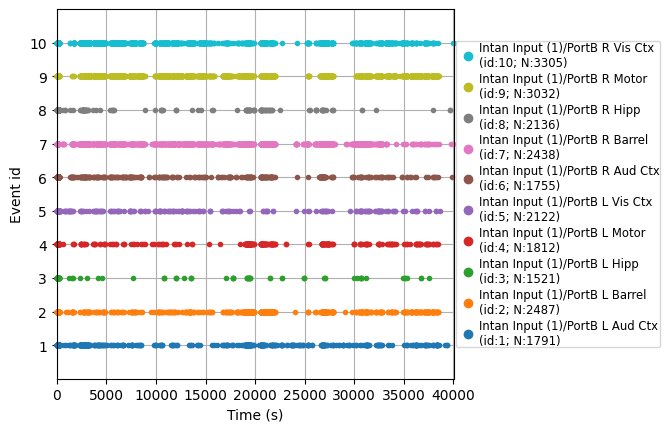

In [18]:
logger.setLevel(logging.WARNING)
events, event_id = mne.events_from_annotations(raw=mne_obj)
fig = mne.viz.plot_events(events, sfreq=mne_obj.info['sfreq'], first_samp=mne_obj.first_samp, event_id=event_id)

In [ ]:
# Pivot the DataFrame to create Day and Night columns
df_pivoted = df.pivot_table(
    index=['animal', 'band'],  # These columns will identify unique rows
    columns='isday',           # The Day/Night values will become columns
    values='values',           # The values will be spread into Day/Night columns
    aggfunc='first'           # Since we expect one value per Day/Night, use first
).reset_index()

# Rename columns for clarity (optional)
df_pivoted.columns.name = None  # Remove the columns name
display(df_pivoted)
